In [1]:
from sklearn.linear_model import LogisticRegression


In [2]:
from google.colab import files
uploaded = files.upload()


Saving default of credit card clients.xls to default of credit card clients.xls


In [3]:
import pandas as pd

file_name = list(uploaded.keys())[0]

df = pd.read_excel(file_name, header=1)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.columns = [
    "ID",
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "default"
]

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.isna().sum()


,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [8]:
df['default'].value_counts(normalize=True)


,proportion
default,
0,0.7788
1,0.2212


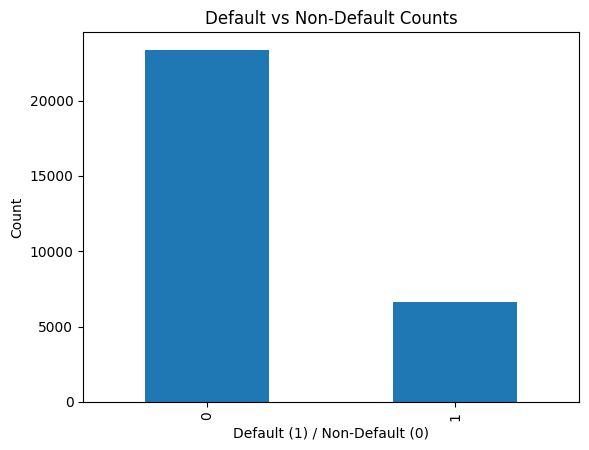

In [9]:
import matplotlib.pyplot as plt

df['default'].value_counts().plot(kind='bar')
plt.title("Default vs Non-Default Counts")
plt.xlabel("Default (1) / Non-Default (0)")
plt.ylabel("Count")
plt.show()


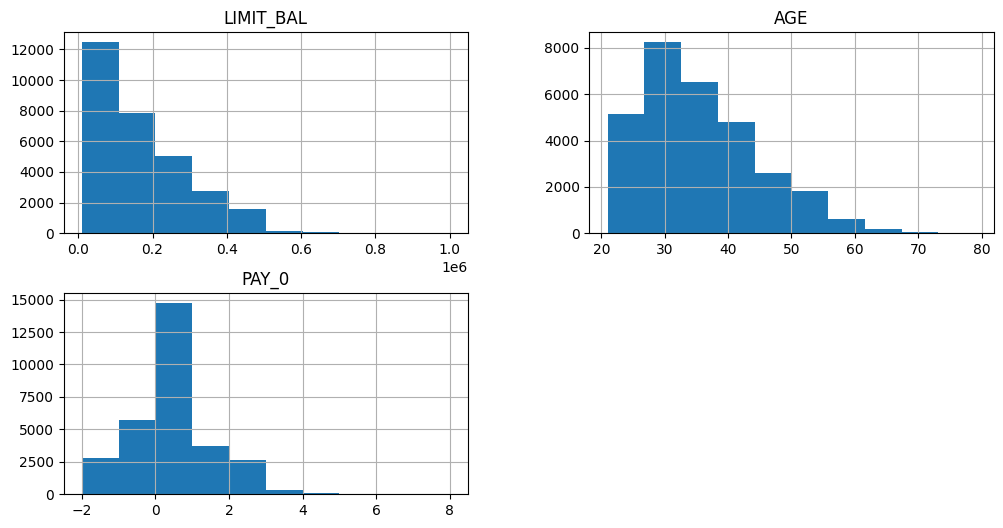

In [10]:
df[['LIMIT_BAL','AGE','PAY_0']].hist(figsize=(12,6))
plt.show()


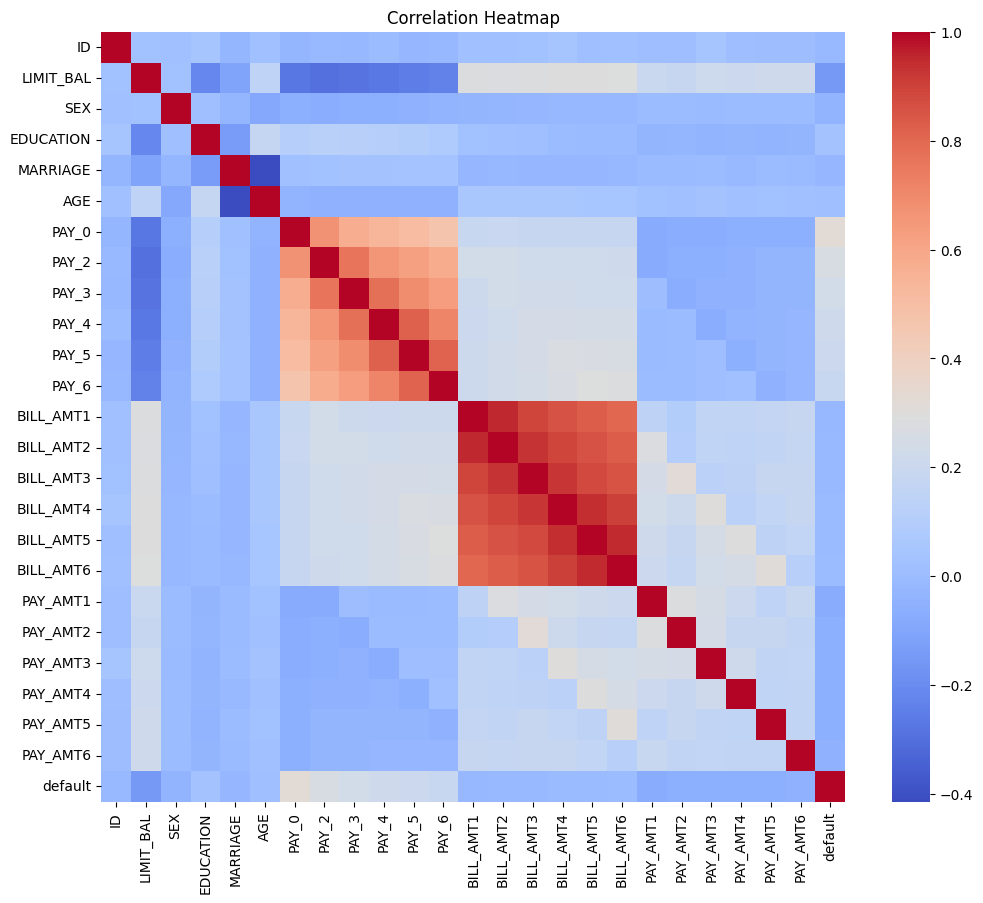

In [11]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [12]:
df.groupby('PAY_0')['default'].mean()


,default
PAY_0,
-2,0.132294
-1,0.167781
0,0.128113
1,0.339479
2,0.691414
3,0.757764
4,0.684211
5,0.500000
6,0.545455


In [13]:
df = df.drop(columns=['ID'])


In [14]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE',
                    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [15]:
X = df.drop(columns=['default'])
y = df['default']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [20]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      5841
           1       0.37      0.63      0.47      1659

    accuracy                           0.68      7500
   macro avg       0.62      0.66      0.62      7500
weighted avg       0.76      0.68      0.70      7500

Confusion Matrix:
[[4052 1789]
 [ 609 1050]]
ROC-AUC Score:
0.7160634862844689


In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
KS = max(tpr - fpr)
KS


np.float64(0.364871939426756)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [24]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [25]:
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest ROC-AUC: 0.7595730292576464

Confusion Matrix:
[[5527  314]
 [1093  566]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5841
           1       0.64      0.34      0.45      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.64      0.67      7500
weighted avg       0.79      0.81      0.79      7500



In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
KS_rf = max(tpr - fpr)
KS_rf


np.float64(0.40628803126121305)

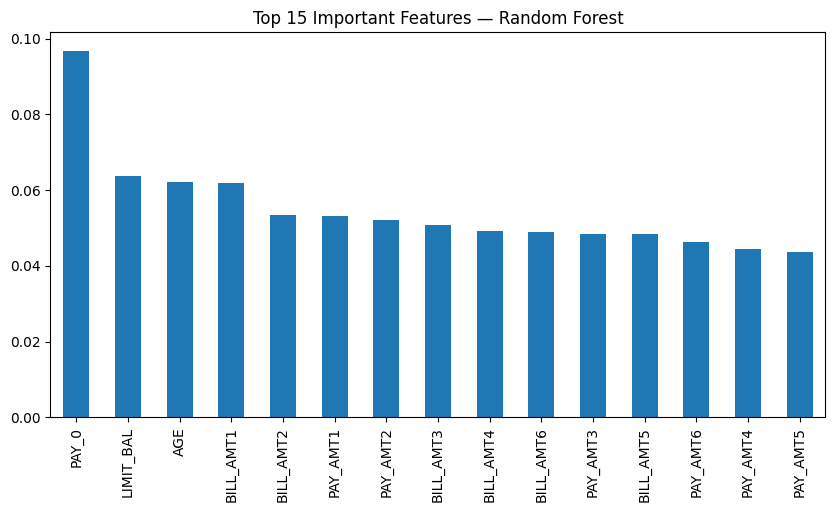

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)[:15].plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Important Features — Random Forest")
plt.show()


In [28]:
!pip install xgboost


In [29]:

cat_cols = X_train.select_dtypes(['category']).columns

for col in cat_cols:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)


In [30]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    max_depth=6,
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic'
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.8206666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.67      0.37      0.48      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500


Confusion Matrix:
 [[5541  300]
 [1045  614]]


In [33]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.7759809659616568


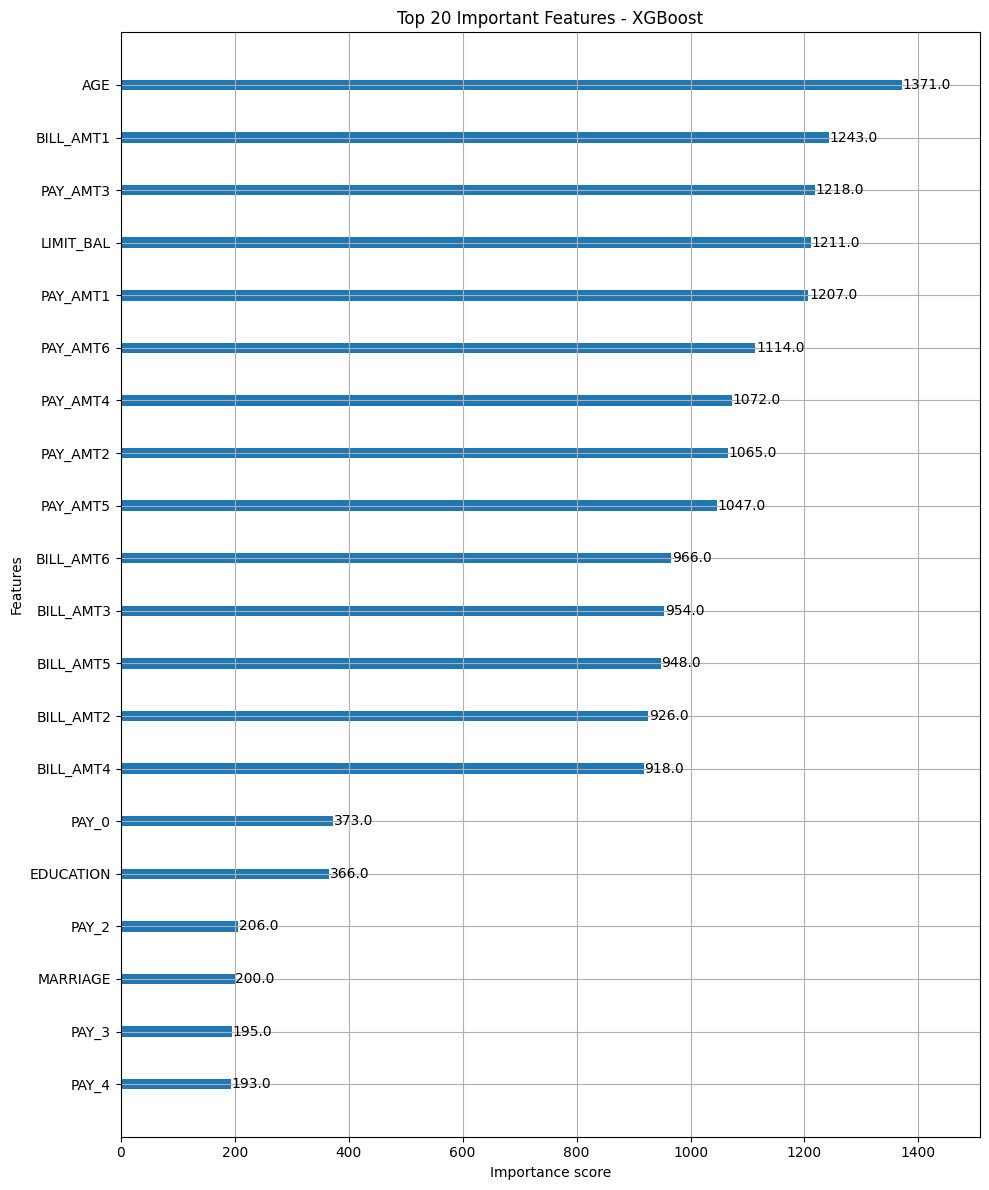

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax, max_num_features=20)
ax.set_title("Top 20 Important Features - XGBoost")
plt.tight_layout()
plt.show()


In [35]:
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance.head(20)


,feature,importance
5,PAY_0,0.299346
6,PAY_2,0.191609
7,PAY_3,0.056112
9,PAY_5,0.042759
8,PAY_4,0.041008
10,PAY_6,0.031885
18,PAY_AMT2,0.023851
0,LIMIT_BAL,0.023388
11,BILL_AMT1,0.022201
17,PAY_AMT1,0.021803


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test, y_pred=None, y_pred_prob=None):
    if y_pred is None:
        y_pred = model.predict(X_test)
    if y_pred_prob is None:
        y_pred_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob)
    }

log_metrics = evaluate_model(log_reg, X_test_scaled, y_test)

xgb_pred = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_metrics = evaluate_model(xgb_model, X_test, y_test, xgb_pred, xgb_pred_prob)

import pandas as pd
results = pd.DataFrame([log_metrics, xgb_metrics], index=["Logistic Regression", "XGBoost"])

results


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.680267,0.369849,0.632911,0.466874,0.716063
XGBoost,0.820667,0.671772,0.370102,0.477264,0.775981
